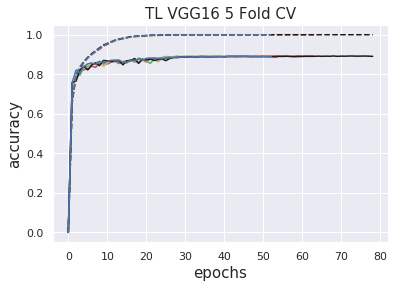

In [10]:
import numpy as np
import matplotlib.pyplot as plt


values = []
colors = ['r', 'g', 'y', 'k', 'b']
histories = np.load('models/vgg16_kfolds.npy', allow_pickle=True)
for i in range(1, 6):
    jc = histories[i-1]
    epoches = jc['epoch']
    epoches = epoches + [len(epoches)]
    train_acc = [0] + jc['history']['accuracy']
    val_acc = [0] + jc['history']['val_accuracy']

    plt.plot(epoches, train_acc, '--', color=colors[i-1])
    plt.plot(epoches, val_acc, color=colors[i-1])
    plt.xlabel('epochs', fontsize=15)
    plt.ylabel('accuracy', fontsize=15)
    values.append('fold{}'.format(i))
# plt.legend(['train', 'val'], fontsize=12)
plt.title('TL VGG16 5 Fold CV', fontsize=15)
# plt.ylim([0.90, .95])
plt.savefig('figures/tl_vgg16_5foldCV.png', dpi=300)
plt.show()

In [ ]:
%matplotlib inline
from modules import utils, vgg16, fcnn, cifar_vgg
    
model = vgg16(train=False)
model = fcnn(train=False, model_path='models/allFeatures_pca1000.h5', 
             features_path='data/allFeatures_pca1000_features.npy')
model = cifar_vgg(train=False)
utils.plot_confusion_matrix(model, title='CIFAR-VGG16', save_path='figures/cifar_vgg_cm.png')

### Sample three correct and wrong classifications


In [ ]:
# load model of interest and predict on testing dataset
from modules import fcnn

model = fcnn(train=False, model_path='models/allFeatures_pca1000.h5', 
             features_path='data/allFeatures_pca1000_features.npy')
preds = model.predict()

In [ ]:
# sample three classes that were correct and three that were not
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import numpy as np
import random
from tensorflow.keras.datasets import cifar10
random.seed(334)

pred_y = []
for i in range(preds.shape[0]):
    pred_y.append(np.argmax(preds[i]))
    
true_y = [int(i) for i in list(model.y_test)]

correct_i = []
incorrect_i = []

for i in range(len(pred_y)):
    if pred_y[i] == true_y[i]:
        correct_i.append(i)
    else:
        incorrect_i.append(i)

# shuffle the lists
random.shuffle(correct_i)
random.shuffle(incorrect_i)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
LABELS = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# for the first three show the image and on the bottom label put the percentages
fig, ax = plt.subplots(nrows=3, figsize=(10, 8))
for j, i in enumerate(correct_i[:3]):
    ax[j].imshow(x_test[i], interpolation='bicubic')
    ax[j].axes.get_yaxis().set_visible(False)
    ax[j].tick_params(axis=u'both', which=u'both',length=0)
    ax[j].set_xticklabels([])
    probs = [float(p) for p in preds[i]]
    labels = LABELS.copy()
    
    # sort the two lists
    probs, labels = (list(t) for t in zip(*sorted(zip(probs, labels))))
    ax[j].set_xlabel('%s: %.2f  | %s: %.2E |  %s: %.2E' % (
        labels[-1], probs[-1], labels[-2], probs[-2], labels[-3], probs[-3]
    ))
plt.savefig('figures/correct_samples.png', dpi=300)
plt.show()

fig, ax = plt.subplots(nrows=3, figsize=(10, 8))
for j, i in enumerate(incorrect_i[:3]):
    ax[j].imshow(x_test[i], interpolation='bicubic')
    ax[j].axes.get_yaxis().set_visible(False)
    ax[j].tick_params(axis=u'both', which=u'both',length=0)
    ax[j].set_xticklabels([])
    probs = [float(p) for p in preds[i]]
    labels = LABELS.copy()
    
    # sort the two lists
    probs, labels = (list(t) for t in zip(*sorted(zip(probs, labels))))
    ax[j].set_xlabel('%s: %.3f  | %s: %.3f |  %s: %.2E' % (
        labels[-1], probs[-1], labels[-2], probs[-2], labels[-3], probs[-3]
    ))
plt.savefig('figures/incorrect_samples.png', dpi=300)
plt.show()

### Kfold cross validation training

In [1]:
from modules import utils, vgg16, fcnn, cifar_vgg
    
model = vgg16(train=False)
model.train_kfold()

Epoch 1/250
624/625 [============================>.] - ETA: 0s - loss: 1.2781 - accuracy: 0.6516
Epoch 00001: val_accuracy improved from -inf to 0.75100, saving model to models/vgg16_fold1.h5
625/625 [==============================] - 54s 87ms/step - loss: 1.2780 - accuracy: 0.6517 - val_loss: 0.9736 - val_accuracy: 0.7510
Epoch 2/250
624/625 [============================>.] - ETA: 0s - loss: 0.8607 - accuracy: 0.7920
Epoch 00002: val_accuracy improved from 0.75100 to 0.77444, saving model to models/vgg16_fold1.h5
625/625 [==============================] - 51s 82ms/step - loss: 0.8609 - accuracy: 0.7921 - val_loss: 0.9120 - val_accuracy: 0.7744
Epoch 3/250
624/625 [============================>.] - ETA: 0s - loss: 0.7416 - accuracy: 0.8294
Epoch 00003: val_accuracy improved from 0.77444 to 0.81971, saving model to models/vgg16_fold1.h5
625/625 [==============================] - 52s 83ms/step - loss: 0.7416 - accuracy: 0.8295 - val_loss: 0.7616 - val_accuracy: 0.8197
Epoch 4/250
624/625

625/625 [==============================] - 51s 82ms/step - loss: 0.1868 - accuracy: 0.9998 - val_loss: 0.7209 - val_accuracy: 0.8872
Epoch 28/250
624/625 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.9999
Epoch 00028: val_accuracy did not improve from 0.88722
625/625 [==============================] - 51s 82ms/step - loss: 0.1837 - accuracy: 0.9999 - val_loss: 0.7101 - val_accuracy: 0.8864
Epoch 29/250
624/625 [============================>.] - ETA: 0s - loss: 0.1813 - accuracy: 0.9999
Epoch 00029: val_accuracy improved from 0.88722 to 0.89002, saving model to models/vgg16_fold1.h5
625/625 [==============================] - 51s 82ms/step - loss: 0.1813 - accuracy: 0.9999 - val_loss: 0.7097 - val_accuracy: 0.8900
Epoch 30/250
624/625 [============================>.] - ETA: 0s - loss: 0.1789 - accuracy: 1.0000
Epoch 00030: val_accuracy did not improve from 0.89002
625/625 [==============================] - 51s 82ms/step - loss: 0.1789 - accuracy: 1.0000 - val_lo

Epoch 56/250
624/625 [============================>.] - ETA: 0s - loss: 0.1289 - accuracy: 1.0000
Epoch 00056: val_accuracy did not improve from 0.89363
625/625 [==============================] - 50s 81ms/step - loss: 0.1289 - accuracy: 1.0000 - val_loss: 0.6752 - val_accuracy: 0.8916
Epoch 57/250
624/625 [============================>.] - ETA: 0s - loss: 0.1273 - accuracy: 1.0000
Epoch 00057: val_accuracy did not improve from 0.89363
625/625 [==============================] - 51s 81ms/step - loss: 0.1273 - accuracy: 1.0000 - val_loss: 0.6734 - val_accuracy: 0.8916
Epoch 58/250
624/625 [============================>.] - ETA: 0s - loss: 0.1257 - accuracy: 1.0000
Epoch 00058: val_accuracy did not improve from 0.89363
625/625 [==============================] - 51s 81ms/step - loss: 0.1257 - accuracy: 1.0000 - val_loss: 0.6707 - val_accuracy: 0.8920
Epoch 59/250
624/625 [============================>.] - ETA: 0s - loss: 0.1241 - accuracy: 1.0000
Epoch 00059: val_accuracy did not improve fr

624/625 [============================>.] - ETA: 0s - loss: 0.3960 - accuracy: 0.9431
Epoch 00009: val_accuracy did not improve from 0.86338
625/625 [==============================] - 50s 81ms/step - loss: 0.3961 - accuracy: 0.9431 - val_loss: 0.7395 - val_accuracy: 0.8401
Epoch 10/250
624/625 [============================>.] - ETA: 0s - loss: 0.3581 - accuracy: 0.9581
Epoch 00010: val_accuracy did not improve from 0.86338
625/625 [==============================] - 51s 82ms/step - loss: 0.3583 - accuracy: 0.9580 - val_loss: 0.7068 - val_accuracy: 0.8572
Epoch 11/250
624/625 [============================>.] - ETA: 0s - loss: 0.3340 - accuracy: 0.9631
Epoch 00011: val_accuracy improved from 0.86338 to 0.87139, saving model to models/vgg16_fold3.h5
625/625 [==============================] - 51s 82ms/step - loss: 0.3340 - accuracy: 0.9631 - val_loss: 0.6780 - val_accuracy: 0.8714
Epoch 12/250
624/625 [============================>.] - ETA: 0s - loss: 0.3088 - accuracy: 0.9723
Epoch 00012: v

Epoch 21/250
624/625 [============================>.] - ETA: 0s - loss: 0.2111 - accuracy: 0.9970
Epoch 00021: val_accuracy did not improve from 0.88001
625/625 [==============================] - 51s 81ms/step - loss: 0.2111 - accuracy: 0.9970 - val_loss: 0.7758 - val_accuracy: 0.8770
Epoch 22/250
624/625 [============================>.] - ETA: 0s - loss: 0.2069 - accuracy: 0.9973
Epoch 00022: val_accuracy did not improve from 0.88001
625/625 [==============================] - 50s 81ms/step - loss: 0.2069 - accuracy: 0.9973 - val_loss: 0.8100 - val_accuracy: 0.8702
Epoch 23/250
624/625 [============================>.] - ETA: 0s - loss: 0.2054 - accuracy: 0.9971
Epoch 00023: val_accuracy did not improve from 0.88001
625/625 [==============================] - 51s 81ms/step - loss: 0.2054 - accuracy: 0.9971 - val_loss: 0.8001 - val_accuracy: 0.8740
Epoch 24/250
624/625 [============================>.] - ETA: 0s - loss: 0.2004 - accuracy: 0.9978
Epoch 00024: val_accuracy did not improve fr

Epoch 49/250
624/625 [============================>.] - ETA: 0s - loss: 0.1405 - accuracy: 1.0000
Epoch 00049: val_accuracy did not improve from 0.89042
625/625 [==============================] - 50s 81ms/step - loss: 0.1405 - accuracy: 1.0000 - val_loss: 0.7363 - val_accuracy: 0.8892
Epoch 50/250
624/625 [============================>.] - ETA: 0s - loss: 0.1387 - accuracy: 1.0000
Epoch 00050: val_accuracy did not improve from 0.89042
625/625 [==============================] - 51s 81ms/step - loss: 0.1387 - accuracy: 1.0000 - val_loss: 0.7352 - val_accuracy: 0.8900
Epoch 51/250
624/625 [============================>.] - ETA: 0s - loss: 0.1370 - accuracy: 1.0000
Epoch 00051: val_accuracy did not improve from 0.89042
625/625 [==============================] - 52s 83ms/step - loss: 0.1370 - accuracy: 1.0000 - val_loss: 0.7345 - val_accuracy: 0.8890
Epoch 52/250
624/625 [============================>.] - ETA: 0s - loss: 0.1353 - accuracy: 1.0000
Epoch 00052: val_accuracy did not improve fr

624/625 [============================>.] - ETA: 0s - loss: 0.0990 - accuracy: 1.0000
Epoch 00077: val_accuracy did not improve from 0.89243
625/625 [==============================] - 51s 82ms/step - loss: 0.0990 - accuracy: 1.0000 - val_loss: 0.7081 - val_accuracy: 0.8916
Epoch 78/250
624/625 [============================>.] - ETA: 0s - loss: 0.0978 - accuracy: 1.0000
Epoch 00078: val_accuracy did not improve from 0.89243
625/625 [==============================] - 51s 82ms/step - loss: 0.0978 - accuracy: 1.0000 - val_loss: 0.7083 - val_accuracy: 0.8906
Epoch 00078: early stopping
Epoch 1/250
624/625 [============================>.] - ETA: 0s - loss: 1.2242 - accuracy: 0.6643
Epoch 00001: val_accuracy improved from -inf to 0.75761, saving model to models/vgg16_fold5.h5
625/625 [==============================] - 52s 83ms/step - loss: 1.2238 - accuracy: 0.6643 - val_loss: 0.9623 - val_accuracy: 0.7576
Epoch 2/250
624/625 [============================>.] - ETA: 0s - loss: 0.8483 - accuracy

625/625 [==============================] - 51s 82ms/step - loss: 0.1960 - accuracy: 0.9983 - val_loss: 0.7546 - val_accuracy: 0.8836
Epoch 26/250
624/625 [============================>.] - ETA: 0s - loss: 0.1918 - accuracy: 0.9989
Epoch 00026: val_accuracy did not improve from 0.88361
625/625 [==============================] - 50s 81ms/step - loss: 0.1918 - accuracy: 0.9990 - val_loss: 0.7304 - val_accuracy: 0.8832
Epoch 27/250
624/625 [============================>.] - ETA: 0s - loss: 0.1864 - accuracy: 0.9998
Epoch 00027: val_accuracy improved from 0.88361 to 0.88442, saving model to models/vgg16_fold5.h5
625/625 [==============================] - 52s 83ms/step - loss: 0.1864 - accuracy: 0.9998 - val_loss: 0.7522 - val_accuracy: 0.8844
Epoch 28/250
624/625 [============================>.] - ETA: 0s - loss: 0.1841 - accuracy: 0.9998
Epoch 00028: val_accuracy improved from 0.88442 to 0.88662, saving model to models/vgg16_fold5.h5
625/625 [==============================] - 51s 82ms/step

#### Print out early stopper epochs for each run we have history

In [5]:
import numpy as np


files = ['models/allFeatures_pca1000.npy', 'models/tfFeatures.npy', 'models/vgg16_second.npy',
        'models/resnet2_second.npy', 'models/']

for f in files:
    history = np.load(f, allow_pickle=True).item()
    n = len(history['epoch'])
    print(n)

51
22
53
86
